<a href="https://colab.research.google.com/github/isegura/OCW-UC3M-NLPDeep-2023/blob/main/tema1_4_splits_visualizar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png" width=50%/>

<h1><font color='#12007a'>Procesamiento de Lenguaje Natural con Aprendizaje Profundo</font></h1>
<p>Autora: Isabel Segura Bedmar</p>

<img align='right' src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" width=15%/>
</center>      

# Problema: Crear split y visualización de un dataset.

En este notebook, vamos a trabajar una colección de reviews de Amazon sobre Alexa. Este dataset puede descargarse desde este [link](#https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews) en Kaggle.

El dataset contiene aproximadamente unos 3.000 comentarios de clientes sobre Alexa. Cada comentario incluye un rating (de 1 a 5 estrellas) para indicar el grado de satisfacción sobre el producto.
El dataset es distribuido en un único fichero, sin proporcionar ningún tipo de división o split para training, validación y test.

En este notebook, aprenderemos:
1) Dividir el dataset en tres splits: training, validación y test.
2) Estudiar la distribución de clases en el dataset.
3) Estudiar la distribución del tamaño de los textos del dataset.


**NOTA PARA PODER EJECUTAR ESTE NOTEBOOK**:

1) Para poder ejercutar correctamente este notebook, deberás abrirlo en tu Google Drive (por ejemplo, en la carpeta 'Colab Notebooks').

2) Además, debes guardar el dataset en tu Google Drive, dentro de carpeta 'Colab Notebooks/data/alexa/'.



## Cargar un dataset





In [ ]:
from google.colab import drive
# mount your google drive
drive.mount('/content/drive')

# cambiamos el directorio de trabajo a la carpeta donde está almacenado el dataset
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/data/alexa/')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("amazon_alexa.tsv",  sep='\t', on_bad_lines='skip')
print('tamaño del dataset:', df.shape)

#show the first rows
df.head()

tamaño del dataset: (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Únicamente nos interesan los campos: **verified_reviews** (textos) y **rating** (clases)Ignoramos las otras columnas. Vamos a ignorar el resto de campos. Además, vamos a renombrar los campos para que se llamen **text** y **label**.


In [ ]:
df = df[['verified_reviews','rating']] # we ignore the other columns
df = df.rename(columns={'verified_reviews':'text','rating':'label'})

df.head()


,text,label
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5


## Crear particiones

El dataset se distribuye en un único fichero. Debemos crear tres particiones distintas para entrenamiento, validación y evaluación final (test), con un ratio de 70:10:20.



Los tamaños esperados serían:

In [ ]:
size_total = df.shape[0]
size_training = size_total*0.70
size_val = size_total*0.10
size_test = size_total*0.20

print(size_total, ", training:", size_training, ", validación:",size_val, ", test:",size_test)


3150 , training: 2205.0 , validación: 315.0 , test: 630.0


Utilizamos el método **train_test_split** de la librería sklearn. Primero creamos la particion de training (70%) dejando el resto para validación y test.

In [ ]:
from sklearn.model_selection import train_test_split

X=df['text']
y=df['label']

X_train, X_aux, y_train, y_aux = train_test_split(X, y,
        test_size=0.30, random_state=42, stratify=y)

print('Tamaño conjunto de entrenamiento:', len(X_train))
print('Resto :', len(X_aux))

Tamaño conjunto de entrenamiento: 2205
Resto : 945


Los parámetros **stratify** y random_state son muy importantes. Con el primero conseguimos que ambas particiones tengan la misma distribución de clases que en el original (y).

Respecto a **random_state**, este nos permite obtener siempre las mismas particiones. De esta forma, nos aseguramos que cualquier que quiera repetir nuestra experimentación lo esté haciendo exactamente con el mismo conjunto de datos que nosotros hemos utilizado.

Ahora tenemos que dividir X_aux, y_aux, para crear el conjunto de validación y el de test.

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux,
        test_size=2/3, random_state=42, stratify=y_aux)

print('Tamaño conjunto de entrenamiento:', len(X_train))
print('Tamaño conjunto de validación:', len(X_val))
print('Tamaño conjunto de evaluación:', len(X_test))

Tamaño conjunto de entrenamiento: 2205
Tamaño conjunto de validación: 315
Tamaño conjunto de evaluación: 630


## Distribución de clases



In [ ]:
counts_train = y_train.value_counts().to_dict()
print("Distribución en training:", counts_train)
counts_val = y_val.value_counts().to_dict()
print("Distribución en validación:", counts_val)
counts_test = y_test.value_counts().to_dict()
print("Distribución en test:", counts_test)

LABELS=counts_train.keys()
print(LABELS)

Distribución en training: {5: 1600, 4: 319, 1: 113, 3: 106, 2: 67}
Distribución en validación: {5: 229, 4: 45, 1: 16, 3: 15, 2: 10}
Distribución en test: {5: 457, 4: 91, 1: 32, 3: 31, 2: 19}
dict_keys([5, 4, 1, 3, 2])


Podemos ver que en las tres particiones, las clases siempre conservan la misma proporción, siendo 5 la clase con más instancias, y 2 la clase con menor número de instancias.
Vamos a representarlo mejor en un gráfico

Text(0, 0.5, 'Número de Instancias')

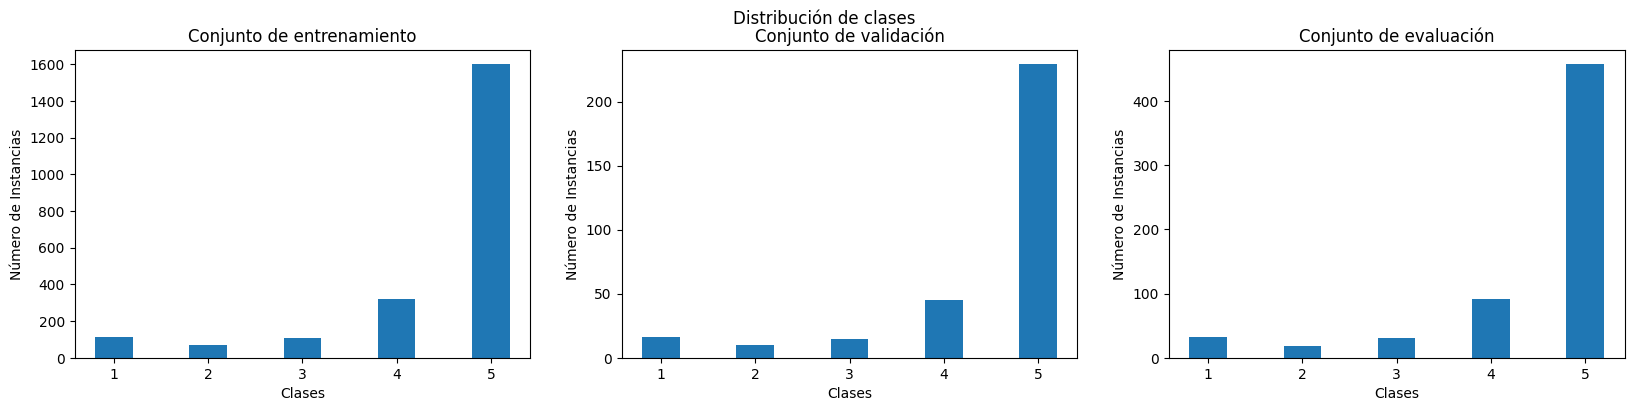

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Distribución de clases')
ax_train.bar(LABELS, counts_train.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_val.bar(LABELS, counts_val.values(), width=0.4)
ax_val.set_title('Conjunto de validación')
ax_val.set_xlabel('Clases')
ax_val.set_ylabel('Número de Instancias')


ax_test.bar(LABELS, counts_test.values(), width=0.4)
ax_test.set_title('Conjunto de evaluación')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

Gracias a los gráficos es más fácil ver la distribución de cada clase en cada dataset.
Podemos ver que la clase 5 es la que tiene más instancias, seguida de la clase 4, aunque con bastante diferencia en número de instancias.
La clase 2 es la clase con menor número de instancias, aunque las clases 1 y 3, en realidad, tienen un tamaño similar al de la clase 2.

La distribución de las clases es similar en los tres subconjuntos.

## Distribución del tamaño de los textos

La longitud de los textos (número de tokens) es una de las propiedades que necesitamos estudiar en un dataset. En particular, conocer la distribución de los tamaños es útil a la hora de seleccionar un tamaño que sea lo suficientemente representativo para todos los textos.

Por el momento, utilizaremos el método split() para dividir un texto en sus tokens.

Podríamos calcular directamente la longitud:

In [ ]:
length_train=X_train.apply(lambda text: len(text.split()))
length_train.describe()

count    2205.000000
mean       26.170522
std        36.618675
min         0.000000
25%         6.000000
50%        15.000000
75%        32.000000
max       526.000000
Name: Text, dtype: float64

El tamaño medio de los textos en el conjunto de entrenamiento es de 26.17 tokens, muy lejos del tamaño máximo que es 525. Podemos ver el 75% de los textos tienen menos de 32 tokens.


In [ ]:
length_train.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    2205.000000
mean       26.170522
std        36.618675
min         0.000000
25%         6.000000
50%        15.000000
75%        32.000000
90%        60.000000
95%        86.800000
99%       171.000000
max       526.000000
Name: Text, dtype: float64

De hecho, el 95% de los textos en el conjunto de entrenamiento tienen menos de 86.8 tokens.

In [ ]:
length_val=X_val.apply(lambda text: len(text.split()))
length_val.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    315.000000
mean      21.320635
std       25.860762
min        0.000000
25%        6.000000
50%       13.000000
75%       26.000000
90%       49.000000
95%       63.000000
99%      125.580000
max      177.000000
Name: Text, dtype: float64

En el conjunto de validación, el tamaño medio es de 21.3 tokens. El tamaño máximo es mucho menor que el tamaño máximo en el conjunto de entrenamiento. Podemos ver que el 95% de los textos tienen menos de 63 tokens en el conjunto de validación.

In [ ]:
length_test=X_test.apply(lambda text: len(text.split()))
length_test.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    630.000000
mean      24.207937
std       30.724473
min        0.000000
25%        5.000000
50%       12.000000
75%       30.000000
90%       64.000000
95%       89.550000
99%      132.420000
max      278.000000
Name: Text, dtype: float64

Respecto al conjunto de test, el tamaño medio es de 24.2 tokens. El tamaño máximo (278) es mucho menor que el tamaño máximo en el conjunto de entrenamiento. Podemos ver que el 95% de los textos tienen menos de 80.5 tokens en el conjunto de test.

Además de analizar la información proporcionada por el método describe(), es interesante construir un histograma que te permita ver visualmente la distribución de los tamaños de los textos.

El objeto Series de Pandas ya proporciona directamente un métodos hist() para ver esta distribución de la serie:

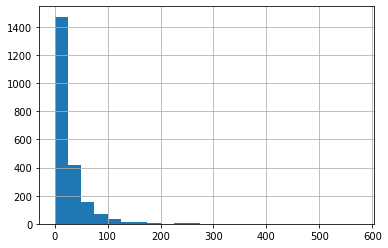

In [ ]:
import numpy as np
length_train.hist(bins = np.arange(0,600,25))

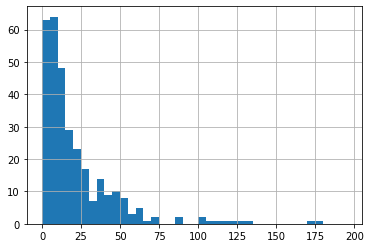

In [ ]:
length_val.hist(bins = np.arange(0,200,5))

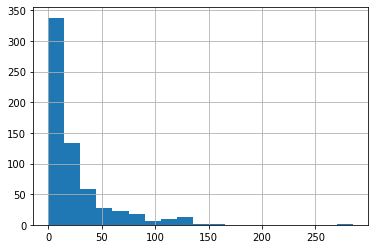

In [ ]:
length_test.hist(bins = np.arange(0,300,15))

La librería seaborn también nos permite construir un histograma:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


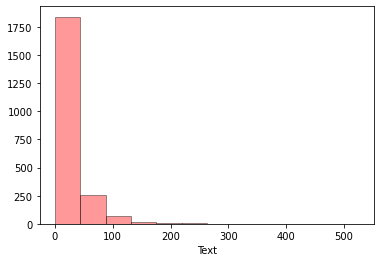

In [ ]:
import seaborn as sns
sns.distplot(length_train, hist=True, kde=False,
             bins=int(600/50), color = 'red',
             hist_kws={'edgecolor':'black'})

Otra alternativa es utilizar la librería de matplotlib. En este caso, mostramos los tres gráficos en una única imagen:

Text(0, 0.5, 'Número de textos')

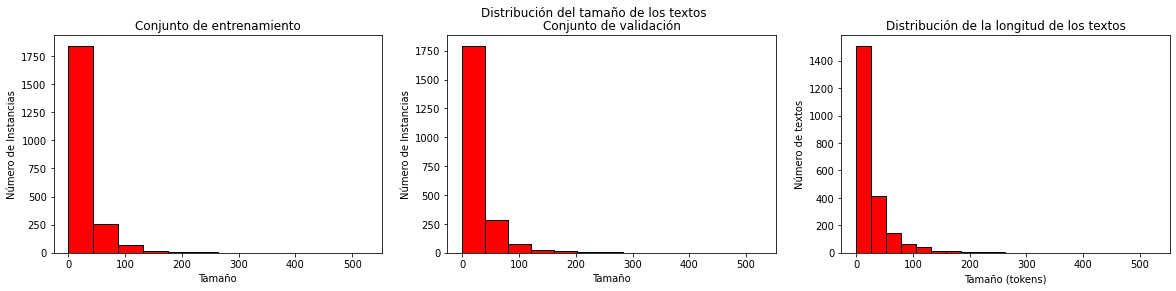

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los textos')

ax_train.hist(length_train,  color = 'red', edgecolor = 'black',
         bins = int(600/50))
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Número de Instancias')

ax_val.hist(length_train,  color = 'red', edgecolor = 'black',
         bins = int(200/15))
ax_val.set_title('Conjunto de validación')
ax_val.set_xlabel('Tamaño')
ax_val.set_ylabel('Número de Instancias')

ax_test.hist(length_train,  color = 'red', edgecolor = 'black',
         bins = int(300/15))
ax_test.set_title('Conjunto test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Número de Instancias')

# Add labels
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Tamaño (tokens)')
plt.ylabel('Número de textos')




También nos podría ser interesante conocer si los textos de una determinada clase tienen la misma longitud que los textos del resto de clases. En este caso, lo mejor es utilizar un gráfico de densidad.
En este caso, lo cálcularemos para todo el dataset.



Text(0, 0.5, 'Densidad')

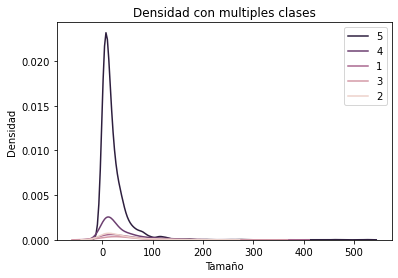

In [ ]:
df['Length'] = df['Text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=df, x='Length', hue='Label')
plt.legend(LABELS)
plt.title('Densidad con multiples clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

Gracias a los tres gráficos, podemos afirmar que la distribución de las clases es similar en los tres subconjuntos de datos.